In [1]:
import numpy as np
from sklearn.metrics import confusion_matrix, precision_recall_curve
import matplotlib.pyplot as plt
import os
import itertools
import glob
from utils import *


In [2]:
iou_treshold = 0.5

IMAGE_WIDHT_HURTIGRUTA = 1920
IMAGE_HEIGHT_HURTIGRUTA = 1088
GROUND_TRUTH_DIRECTORY = '/cluster/home/solveijm/hurtigruten/'

PREDICTED_PATH = '../../runs/detect/test_1cls_100e_640imgsz_terminal/labels/'

In [3]:
test_image_paths = os.path.join(GROUND_TRUTH_DIRECTORY, 'test.txt')
with open(test_image_paths, 'r') as f:
    test_image_filenames = [line.strip().split('/')[-1].split('.')[0] for line in f.readlines()]

ground_truth_annot_paths = [f'{GROUND_TRUTH_DIRECTORY}/labels/{name}.txt' for name in test_image_filenames]

predicted_annot_paths = [os.path.join(PREDICTED_PATH, filename) for filename in os.listdir(PREDICTED_PATH)]


# Calculate confusion matrix

In [4]:
# Load the ground truth and predicted bounding boxes

def get_filename_hurtigruta(path):
    return path.strip().split('/')[-1].split('.')[0]

ground_truth_annots = {get_filename_hurtigruta(image): read_annotations_yolo(image, IMAGE_WIDHT_HURTIGRUTA, IMAGE_HEIGHT_HURTIGRUTA) for image in ground_truth_annot_paths}
predicted_detections = {get_filename_hurtigruta(image): read_annotations_yolo(image, IMAGE_WIDHT_HURTIGRUTA, IMAGE_HEIGHT_HURTIGRUTA) for image in predicted_annot_paths}

# Display precision, recall and confusion matrix

In [5]:
# Compute the precision and recall for each class

confusion_matrix = compute_confusion_matrix(ground_truth_annots, predicted_detections, iou_treshold)

tp = confusion_matrix[0][0]
fp = confusion_matrix[0][1]
fn = confusion_matrix[1][0]

precision = compute_precision(tp, fp)
recall = compute_recall(tp, fn)

# Display the results
print("Confusion matrix:")
print(confusion_matrix)
print("Precision:")
print(precision)
print("Recall:")
print(recall)

Confusion matrix:
[[1045  590]
 [ 210    0]]
Precision:
0.6391437308868502
Recall:
0.8326693227091634


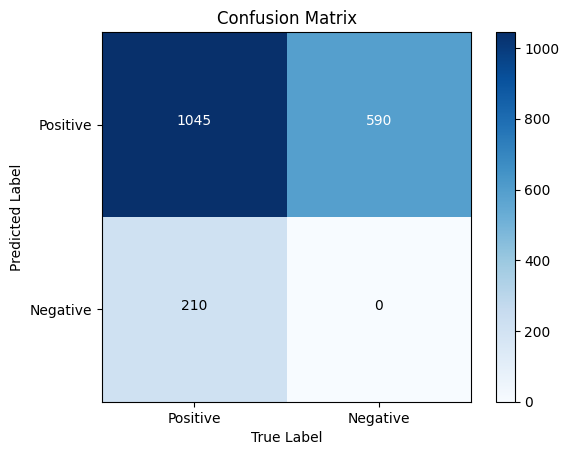

In [6]:
display_empiric_confusion_matrix(confusion_matrix)

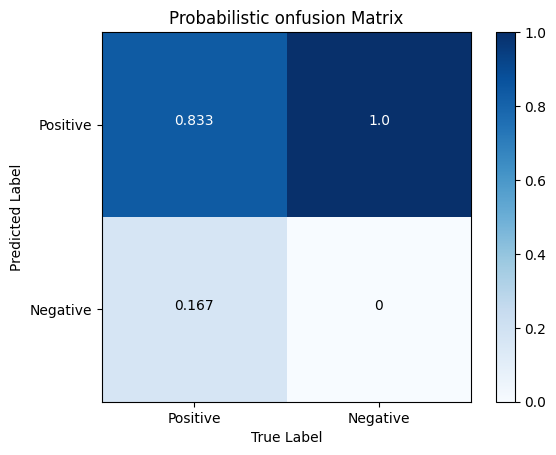

In [7]:
display_probabilistic_confusion_matrix(confusion_matrix)

# Bounding box variation

In [8]:
bbox_error_vectors = compute_all_bbox_errors(ground_truth_annots, predicted_detections, iou_treshold)

In [9]:
cx_e = [x[0] for x in bbox_error_vectors]
cy_e = [x[1] for x in bbox_error_vectors]
width_e = [x[2] for x in bbox_error_vectors]
height_e = [x[3] for x in bbox_error_vectors]


In [10]:
print('IoU threshold: ', iou_treshold)
print('Error of center x')
cx_expected_value, cx_variance = calculate_varinace(cx_e)
print('\nError of center y')
cy_expected_value, cy_variance = calculate_varinace(cy_e)
print('\nError of width')
width_expected_value, width_variance = calculate_varinace(width_e)
print('\nError of height')
height_expected_value, height_variance = calculate_varinace(height_e)


IoU threshold:  0.5
Error of center x
Expected value: -0.0013992537313432835
Variance: 9.477843191342748

Error of center y
Expected value: -0.6749067164179104
Variance: 12.488297565925084

Error of width
Expected value: 0.9486940298507462
Variance: 55.26509157802397

Error of height
Expected value: 1.2527985074626866
Variance: 72.27284664596831


# Metrics vs time

In [11]:
dropout_images = dropout_per_image(ground_truth_annots, predicted_detections, iou_treshold)

In [12]:
sorted_image_numbers = list(dropout_images.keys())
sorted_image_numbers.sort()
sorted_dropout = [dropout_images[image_number] for image_number in sorted_image_numbers]

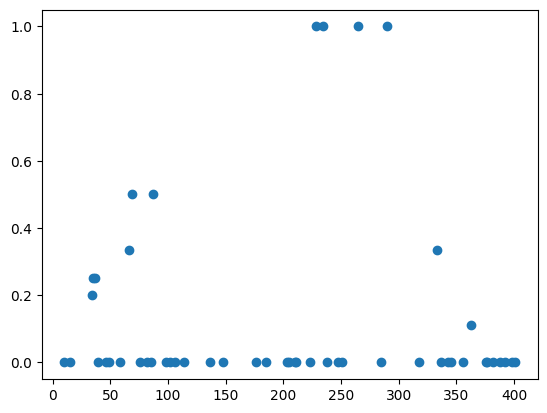

In [13]:
plt.plot(sorted_image_numbers[:50], sorted_dropout[:50], 'o')